# Produisez une étude de marché

# Scénario
Votre entreprise **d'agroalimentaire** souhaite se développer à l'international. Elle est spécialisée dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **à cibler plus particulièrement certains pays**, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).


Pour identifier les pays propices à une insertion dans le marché du poulet,
 Il vous a été demandé de cibler les pays. 
 Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [62]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn.cluster import KMeans
from sklearn import cluster


In [63]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [64]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [65]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1: Construisez un échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :\

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;\
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;\
disponibilité alimentaire en protéines par habitant ;\
disponibilité alimentaire en calories par habitant.

# 1. Import des données

## 1.1 Import et traitement de la population par pays
la variation de la population entre 2013 et 2019, en %, qui sera positive en cas de croissance ou négative en cas de baisse démographique ;

Sources FAO (http://www.fao.org/faostat/fr/#data)

In [66]:
df_population = pd.read_csv('datas/fao-populations_2019- 2013.csv' , header=0, sep=",", decimal=".")
df_population.head(5)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,38041.754,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53687.121,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,58558.270,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2903.790,X,Sources internationales sûres,NaN


In [67]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Année', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

,Code zone (FAO),Zone,Produit,Année,Valeur
0,2,Afghanistan,Population-Estimations,2013,32269589.0
1,2,Afghanistan,Population-Estimations,2019,38041754.0
2,202,Afrique du Sud,Population-Estimations,2013,53687121.0
3,202,Afrique du Sud,Population-Estimations,2019,58558270.0
4,3,Albanie,Population-Estimations,2013,2903790.0


In [68]:
df_population = df_population.pivot_table(index=['Code zone (FAO)', 'Zone'], columns='Année', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head()

Année,Code zone (FAO),Zone,2013,2019
0,1,Arménie,2897588.0,2957731.0
1,2,Afghanistan,32269589.0,38041754.0
2,3,Albanie,2903790.0,2880917.0
3,4,Algérie,38140133.0,43053054.0
4,5,Samoa américaines,55713.0,55312.0


In [69]:
# différence de population entre 2013 et 2019, exprimée en pourcentage
df_population['Evolution population (%)'] = round(((df_population[2019]-df_population[2013])/df_population[2013])*100,3)


In [70]:
population2013 = df_population[2013].sum()
population2019 = df_population[2019].sum()
evolution_globale = round(((population2019 - population2013) / population2013)*100,3)
print('Pour indication, la population totale en 2013 était de', population2013, 'et de', population2019, 'en 2019.\nL\'évolution 2013/2019 est de', evolution_globale, '%.')


Pour indication, la population totale en 2013 était de 8633816910.0 et de 9179381901.0 en 2019.
L'évolution 2013/2019 est de 6.319 %.


In [71]:
df_population= df_population.rename(columns= {2019: 'population', 'Code zone (FAO)':'Code zone'})
df_population= df_population[['Code zone', 'Zone' , 'population' ,'Evolution population (%)']]
df_population.head(2)


Année,Code zone,Zone,population,Evolution population (%)
0,1,Arménie,2957731.0,2.076
1,2,Afghanistan,38041754.0,17.887


## 1.2 Données sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantité de protéines d’origine animale et la quantité totale de protéines consommées ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [72]:
df_dispo_alimentaire = pd.read_csv('datas/FAOSTAT_data.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2019,2019,Kcal/personne/jour,2273.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2019,2019,g/personne/jour,57.31,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2901,Total General,2019,2019,g/personne/jour,39.78,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2019,2019,Kcal/personne/jour,187.00,Fc,Donnée calculée


In [73]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    52.86               94.29  
1                                                    10.34               57.31  
2                                                    62.47              116.02  
3                                                    24.09               90.84  
4                                                    15.54               52.09

In [74]:
# proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays
df_dispo_alimentaire["ratio_proteines_animales"] = round((df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General')])*100,3)
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    52.86         
1                                                    10.34         
2                                                    62.47         
3                                                    24.09         
4                                                    15.54         

Élément               ratio_proteines_animales  
Produit Total General                           
0               94.29                   56.061  
1               57.31                   18.042  
2              116.02                   53.844  
3               90.84                   26.519  
4               52.09                   29.833

## 1.3 Construction et sauvegarde du dataframe principal


In [75]:
df_bilans = pd.merge(df_population, df_dispo_alimentaire, on="Code zone")

df_bilans = df_bilans[["Code zone","Zone", ('Année', ''), 'population','Evolution population (%)',
                                             ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'),
                                             ('ratio_proteines_animales', '')]]
df_bilans.rename(columns={('Année', ''):'Année', 
                              ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'dispo_proteines',  ('ratio_proteines_animales', ''):'ratio_proteines_animales'},
                     inplace=True)

df_bilans["dispo_calories"] *= 365
df_bilans["dispo_proteines"] *= 365

df_bilans.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042
2,3,Albanie,2019,2880917.0,-0.788,1218370.0,42347.30,53.844
3,4,Algérie,2019,43053054.0,12.881,1274945.0,33156.60,26.519
4,7,Angola,2019,31825295.0,22.331,892425.0,19012.85,29.833


# 2.Enrichissement du fichier de données

## 2.1  les valeurs de PIB par habitant,
https://www.fao.org/faostat/fr/#data/FS

In [76]:
# Dataframes des données complémentaires
# Indicateurs Macro (PIB et croissance)
df_indicateurs_macro = pd.read_csv('datas/indicateurs_macro.csv', header=0, sep=',', decimal='.')

df_indicateurs_macro.head(2)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,2065.0,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,12481.8,X,Sources internationales sûres,NaN


In [77]:
df_indicateurs_macro = df_indicateurs_macro[['Code zone (FAO)','Élément','Valeur','Produit']]
                             
df_indicateurs_macro.head(2) 

,Code zone (FAO),Élément,Valeur,Produit
0,2,Valeur,2065.0,"PIB par habitant, ($ PPA internationaux consta..."
1,202,Valeur,12481.8,"PIB par habitant, ($ PPA internationaux consta..."


In [78]:
df_indicateurs_macro = df_indicateurs_macro.pivot_table(index=['Code zone (FAO)'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()

df_indicateurs_macro

Produit,Code zone (FAO),"PIB par habitant, ($ PPA internationaux constants de 2011)"
0,1,13653.8
1,2,2065.0
2,3,13671.5
3,4,11510.6
4,7,6670.3
...,...,...
182,272,18292.2
183,273,21533.9
184,276,4185.6
185,299,6245.4


In [79]:
df_indicateurs_macro = df_indicateurs_macro.rename(columns={"PIB par habitant, ($ PPA internationaux constants de 2011)":"PIB_par_habitant",'Code zone (FAO)':'Code zone'})
df_indicateurs_macro= df_indicateurs_macro[['Code zone','PIB_par_habitant']]
df_indicateurs_macro.head(2) 



Produit,Code zone,PIB_par_habitant
0,1,13653.8
1,2,2065.0


## 2.2 Le taux de dépendance aux importations, 
défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;
https://www.fao.org/faostat/fr/#data/FBS

In [80]:
df_dépendance_importations = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_dépendance_importations.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67,S,Données standardisées


Le TDI  : au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même

In [81]:
df_dépendance_importations = df_dépendance_importations.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dépendance_importations.head(3)

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production
0,1,Arménie,2019,55.0,43.0,12.0
1,2,Afghanistan,2019,67.0,44.0,28.0
2,3,Albanie,2019,34.0,22.0,12.0


Au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même. https://www.fao.org/3/x9892f/x9892f09.htm

In [82]:
#le taux de dépendance aux importations, défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

#df_dépendance_importations['taux_dépendance_importations(٪)']=((df_dépendance_importations['Importations - Quantité'] )  / 
                                                              #(df_dépendance_importations['Disponibilité intérieure']))*100
df_dépendance_importations['taux_suffisance(٪)']=((df_dépendance_importations['Production'] )  / 
                                                              (df_dépendance_importations['Disponibilité intérieure']))*100


df_dépendance_importations.head(2)

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production,taux_suffisance(٪)
0,1,Arménie,2019,55.0,43.0,12.0,21.818182
1,2,Afghanistan,2019,67.0,44.0,28.0,41.791045


Le taux_suffisance
Production  ÷ (Production alimentaire domestique + importations ー exportations) ×100

In [83]:
#df_dépendance_importations = df_dépendance_importations.rename(columns={"Importations - Quantité":'Importations',})

In [84]:
df_dépendance_importations = df_dépendance_importations[['Code zone', 'Production','taux_suffisance(٪)']]
df_dépendance_importations.head(2)

Élément,Code zone,Production,taux_suffisance(٪)
0,1,12.0,21.818182
1,2,28.0,41.791045


In [85]:
df = pd.merge(df_bilans, df_indicateurs_macro, on="Code zone")
df.head(7)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,13653.8
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,2065.0
2,3,Albanie,2019,2880917.0,-0.788,1218370.0,42347.30,53.844,13671.5
3,4,Algérie,2019,43053054.0,12.881,1274945.0,33156.60,26.519,11510.6
4,7,Angola,2019,31825295.0,22.331,892425.0,19012.85,29.833,6670.3
5,8,Antigua-et-Barbuda,2019,97118.0,6.121,907025.0,29492.00,63.515,21548.7
6,9,Argentine,2019,44780677.0,6.125,1205960.0,39036.75,63.478,22063.9


In [86]:
df = pd.merge(df, df_dépendance_importations, on="Code zone")

df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045


In [87]:
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045


In [88]:
df=df.drop('Code zone', axis=1)
df=df.drop('Année', axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   population                170 non-null    float64
 2   Evolution population (%)  170 non-null    float64
 3   dispo_calories            170 non-null    float64
 4   dispo_proteines           170 non-null    float64
 5   ratio_proteines_animales  170 non-null    float64
 6   PIB_par_habitant          170 non-null    float64
 7   Production                168 non-null    float64
 8   taux_suffisance(٪)        168 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.3+ KB


In [90]:
#Identifier la présence de doublons
print(df.duplicated().sum())


0


In [91]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
45,Djibouti,973560.0,10.219,1020175.0,24064.45,19.733,5534.8,NaN,NaN
92,Maldives,530953.0,27.758,807380.0,29203.65,61.430,19531.0,NaN,NaN


In [92]:
df=df.dropna()


In [93]:
df.describe()

,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
count,1.680000e+02,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000
mean,4.489568e+07,8.416298,1.057518e+06,29923.438690,42.862577,20263.594643,776.553571,79.934417
std,1.588863e+08,7.323273,1.653088e+05,7707.149617,16.047467,20859.046094,2695.986837,65.531765
min,5.282300e+04,-8.286000,6.230550e+05,9457.150000,7.082000,751.700000,0.000000,0.000000
25%,2.931438e+06,2.996500,9.420650e+05,23893.812500,29.192250,4737.900000,11.750000,37.614943
50%,9.715398e+06,7.412000,1.051748e+06,29877.075000,45.690500,13076.150000,76.000000,88.269329
75%,3.262827e+07,13.879500,1.203314e+06,35671.450000,56.088000,28995.925000,351.250000,101.412943
max,1.465634e+09,32.145000,1.409630e+06,52538.100000,74.662000,127162.000000,22858.000000,695.302013


In [94]:
df= df.dropna()

In [95]:
#Retrait du pays 'France' sur notre échantillon 
df = df[df['Zone'] != 'France']

In [96]:
#Calcul de fréquence en Chine
df[df['Zone'].str.contains('hin')]

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
60,Chine - RAS de Hong-Kong,7.436154e+06,4.900,1181140.0,47249.25,74.662,59586.2,19.0,4.318182
88,Chine - RAS de Macao,6.404450e+05,10.924,1208880.0,39168.15,64.458,127162.0,3.0,13.636364
169,Chine,1.465634e+09,2.998,1219100.0,38365.15,39.597,16361.5,21195.0,99.106892


In [97]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']

In [98]:
df.style.background_gradient(cmap='BrBG')


,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,Arménie,2957731.000000,2.076000,1103030.000000,34415.850000,56.061000,13653.800000,12.000000,21.818182
1,Afghanistan,38041754.000000,17.887000,829645.000000,20918.150000,18.042000,2065.000000,28.000000,41.791045
2,Albanie,2880917.000000,-0.788000,1218370.000000,42347.300000,53.844000,13671.500000,12.000000,35.294118
3,Algérie,43053054.000000,12.881000,1274945.000000,33156.600000,26.519000,11510.600000,291.000000,101.393728
4,Angola,31825295.000000,22.331000,892425.000000,19012.850000,29.833000,6670.300000,49.000000,14.984709
5,Antigua-et-Barbuda,97118.000000,6.121000,907025.000000,29492.000000,63.515000,21548.700000,0.000000,0.000000
6,Argentine,44780677.000000,6.125000,1205960.000000,39036.750000,63.478000,22063.900000,2248.000000,111.287129
7,Australie,25203198.000000,8.378000,1247205.000000,39398.100000,67.547000,49455.500000,1278.000000,102.815768
8,Autriche,8955102.000000,4.662000,1347215.000000,39766.750000,59.192000,55833.300000,132.000000,74.576271
9,Bahamas,389482.000000,6.077000,958490.000000,27776.500000,63.640000,37100.400000,6.000000,27.272727


In [99]:
df

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,Arménie,2957731.0,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182
1,Afghanistan,38041754.0,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045
2,Albanie,2880917.0,-0.788,1218370.0,42347.30,53.844,13671.5,12.0,35.294118
3,Algérie,43053054.0,12.881,1274945.0,33156.60,26.519,11510.6,291.0,101.393728
4,Angola,31825295.0,22.331,892425.0,19012.85,29.833,6670.3,49.0,14.984709
...,...,...,...,...,...,...,...,...,...
164,Belgique,11539328.0,3.455,1387000.0,36624.10,60.375,51742.7,448.0,239.572193
165,Luxembourg,615729.0,13.486,1278960.0,39766.75,61.083,113940.0,0.0,0.000000
166,Serbie,8772235.0,-1.644,1045725.0,31601.70,50.578,18292.2,104.0,92.857143
167,Monténégro,627987.0,0.262,1284800.0,40876.35,60.246,21533.9,4.0,40.000000


In [100]:
df.to_csv('exports/df.csv', index=False)

In [101]:
df_bilans.to_csv('exports/df_bilans.csv', index=False)

# Mission 2 : réalisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 


# Environnement


In [102]:
#import
df = pd.read_csv('exports/df.csv')

df.head(2)

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,Arménie,2957731.0,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182
1,Afghanistan,38041754.0,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045


In [103]:
#pays comme index
df_bilans_clus=df.set_index('Zone', drop=True, append=False, inplace=False, verify_integrity=False)

# préparation des données pour le clustering
df_bilans_clus = df_bilans_clus[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales",'PIB_par_habitant','Production','taux_suffisance(٪)']]

df_bilans_clus.head(2)


,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
Zone,,,,,,,
Arménie,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182
Afghanistan,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045


# Aperçu des corrélations

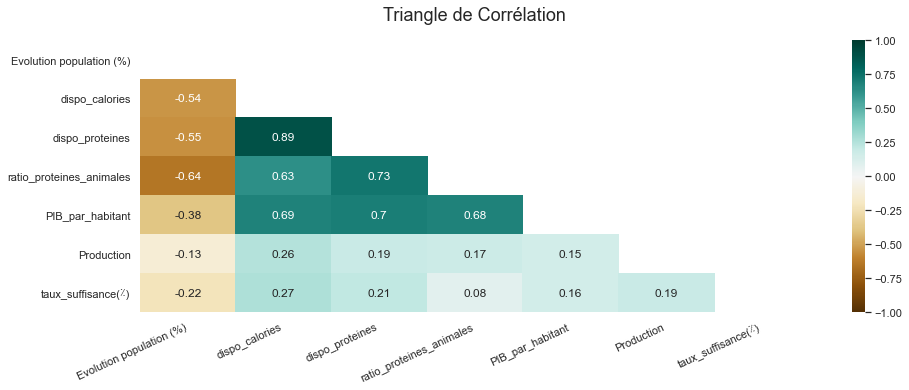

In [104]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_bilans_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_bilans_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('Triangle de Corrélation',  fontsize=18, pad=20)

plt.show()

# Observations

D'après le tableau de corrélation coloré ci-dessus, on peut constater une corrélation positive  forte entre la disponibilité alimentaire en protéine par personnes et celle en kcal par personne .

On peut aussi  constater une corrélation positive  forte entre la pourcentage de protéine d'origine animale et celle en kcal  , protéines par personne et le PIB

Dans une moindre mesure, on retrouve également une corrélation négative entre le pourcentage d'évolution de la population et les différents régimes alimentaires des pays (protéines, kcal, pourcentage de protéine d'origine animale).

Nous sommes intéressés par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de protéines animales. Les corrélations montrent que ces pays sont susceptibles d'avoir un fort PIB, et de grandes disponibilités en protéines et calories.

# Clustering

## Classification des pays via Clustering Hiérarchique Ascendant (CHA)

La classification sera établie sur la base des variables suivantes :

**La différence de population entre l'année 2013 et l'année 2019, exprimée en pourcentage;\
La proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays;\
La disponibilité alimentaire en grammes de protéines par habitant ;\
La disponibilité alimentaire en Kcal par habitant.\
PIB par habitant.\
Rapport de dépendance à l'importation.\
La taux suffisance(٪).\
Production**

L'échantillon comporte peu de variables sur la dimension dite du "Régime alimentaire", il comporte également un nombre de pays "maîtrisables" qui permet de commencer par une classification hiérarchique. Algorithme qui a une forte complexité algorithmique en temps et en espace, le clustering hiérarchique est recommandé pour les petits échantillons.


# Premier clustering

Le partitionnement ou clustering a pour objectif de créer des groupes d’observations homogènes.

Au préalable, il est nécessaire de centrer-réduire les données. C’est à dire, recalculer chaque valeur de manière à ce que la moyenne de la variable soit égale à 0 et la variance et l’écart-type égalent 1. Pour une variable donnée, on soustrait à chaque valeur la moyenne de la variable, puis on divise le tout par l’écart-type.

Ensuite, nous pouvons procéder à la classification ascendante hiérarchique selon la méthode de Ward. **L’objectif est de regrouper des pays similaires.**

In [105]:
# dans array numpy
X = df_bilans_clus.values 
pays = df_bilans_clus.index
#nous allons extraire les données d'expression de 175 pays  dans un tableau de données numériques .
 #X comporte uniquement les données  , il ne contient pas les étiquettes des échantillons.
 #Conservons les étiquettes de chaque échantillon  dans la variable pays.
print('X', X.shape)
print('pays', pays.shape, pays.unique())

# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
#Le score standard d'un échantillon x est calculé comme suit :
#z = (x - u) / s où
# u est la moyenne des échantillons d'apprentissage ou zéro si with_mean=False, 
# s est l'écart type des échantillons d'apprentissage ou un si with_std=False.

X_cr = std_scale.fit_transform(X)
#Appelez X on self en produisant un DataFrame avec la même forme d'axe que self.
print('X_cr', X_cr.shape)
X_cr = pd.DataFrame(X_cr, index =df_bilans_clus.index, columns=df_bilans_clus.columns)
X_cr.head(2)

X (166, 7)
pays (166,) Index(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche', 'Bahamas',
       ...
       'Viet Nam', 'Éthiopie', 'Samoa', 'République démocratique du Congo',
       'Zambie', 'Belgique', 'Luxembourg', 'Serbie', 'Monténégro', 'Soudan'],
      dtype='object', name='Zone', length=166)
X_cr (166, 7)


,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
Zone,,,,,,,
Arménie,-0.876478,0.291365,0.600965,0.827302,-0.311132,-0.291021,-0.880843
Afghanistan,1.284787,-1.372236,-1.160797,-1.542089,-0.867621,-0.283703,-0.576778


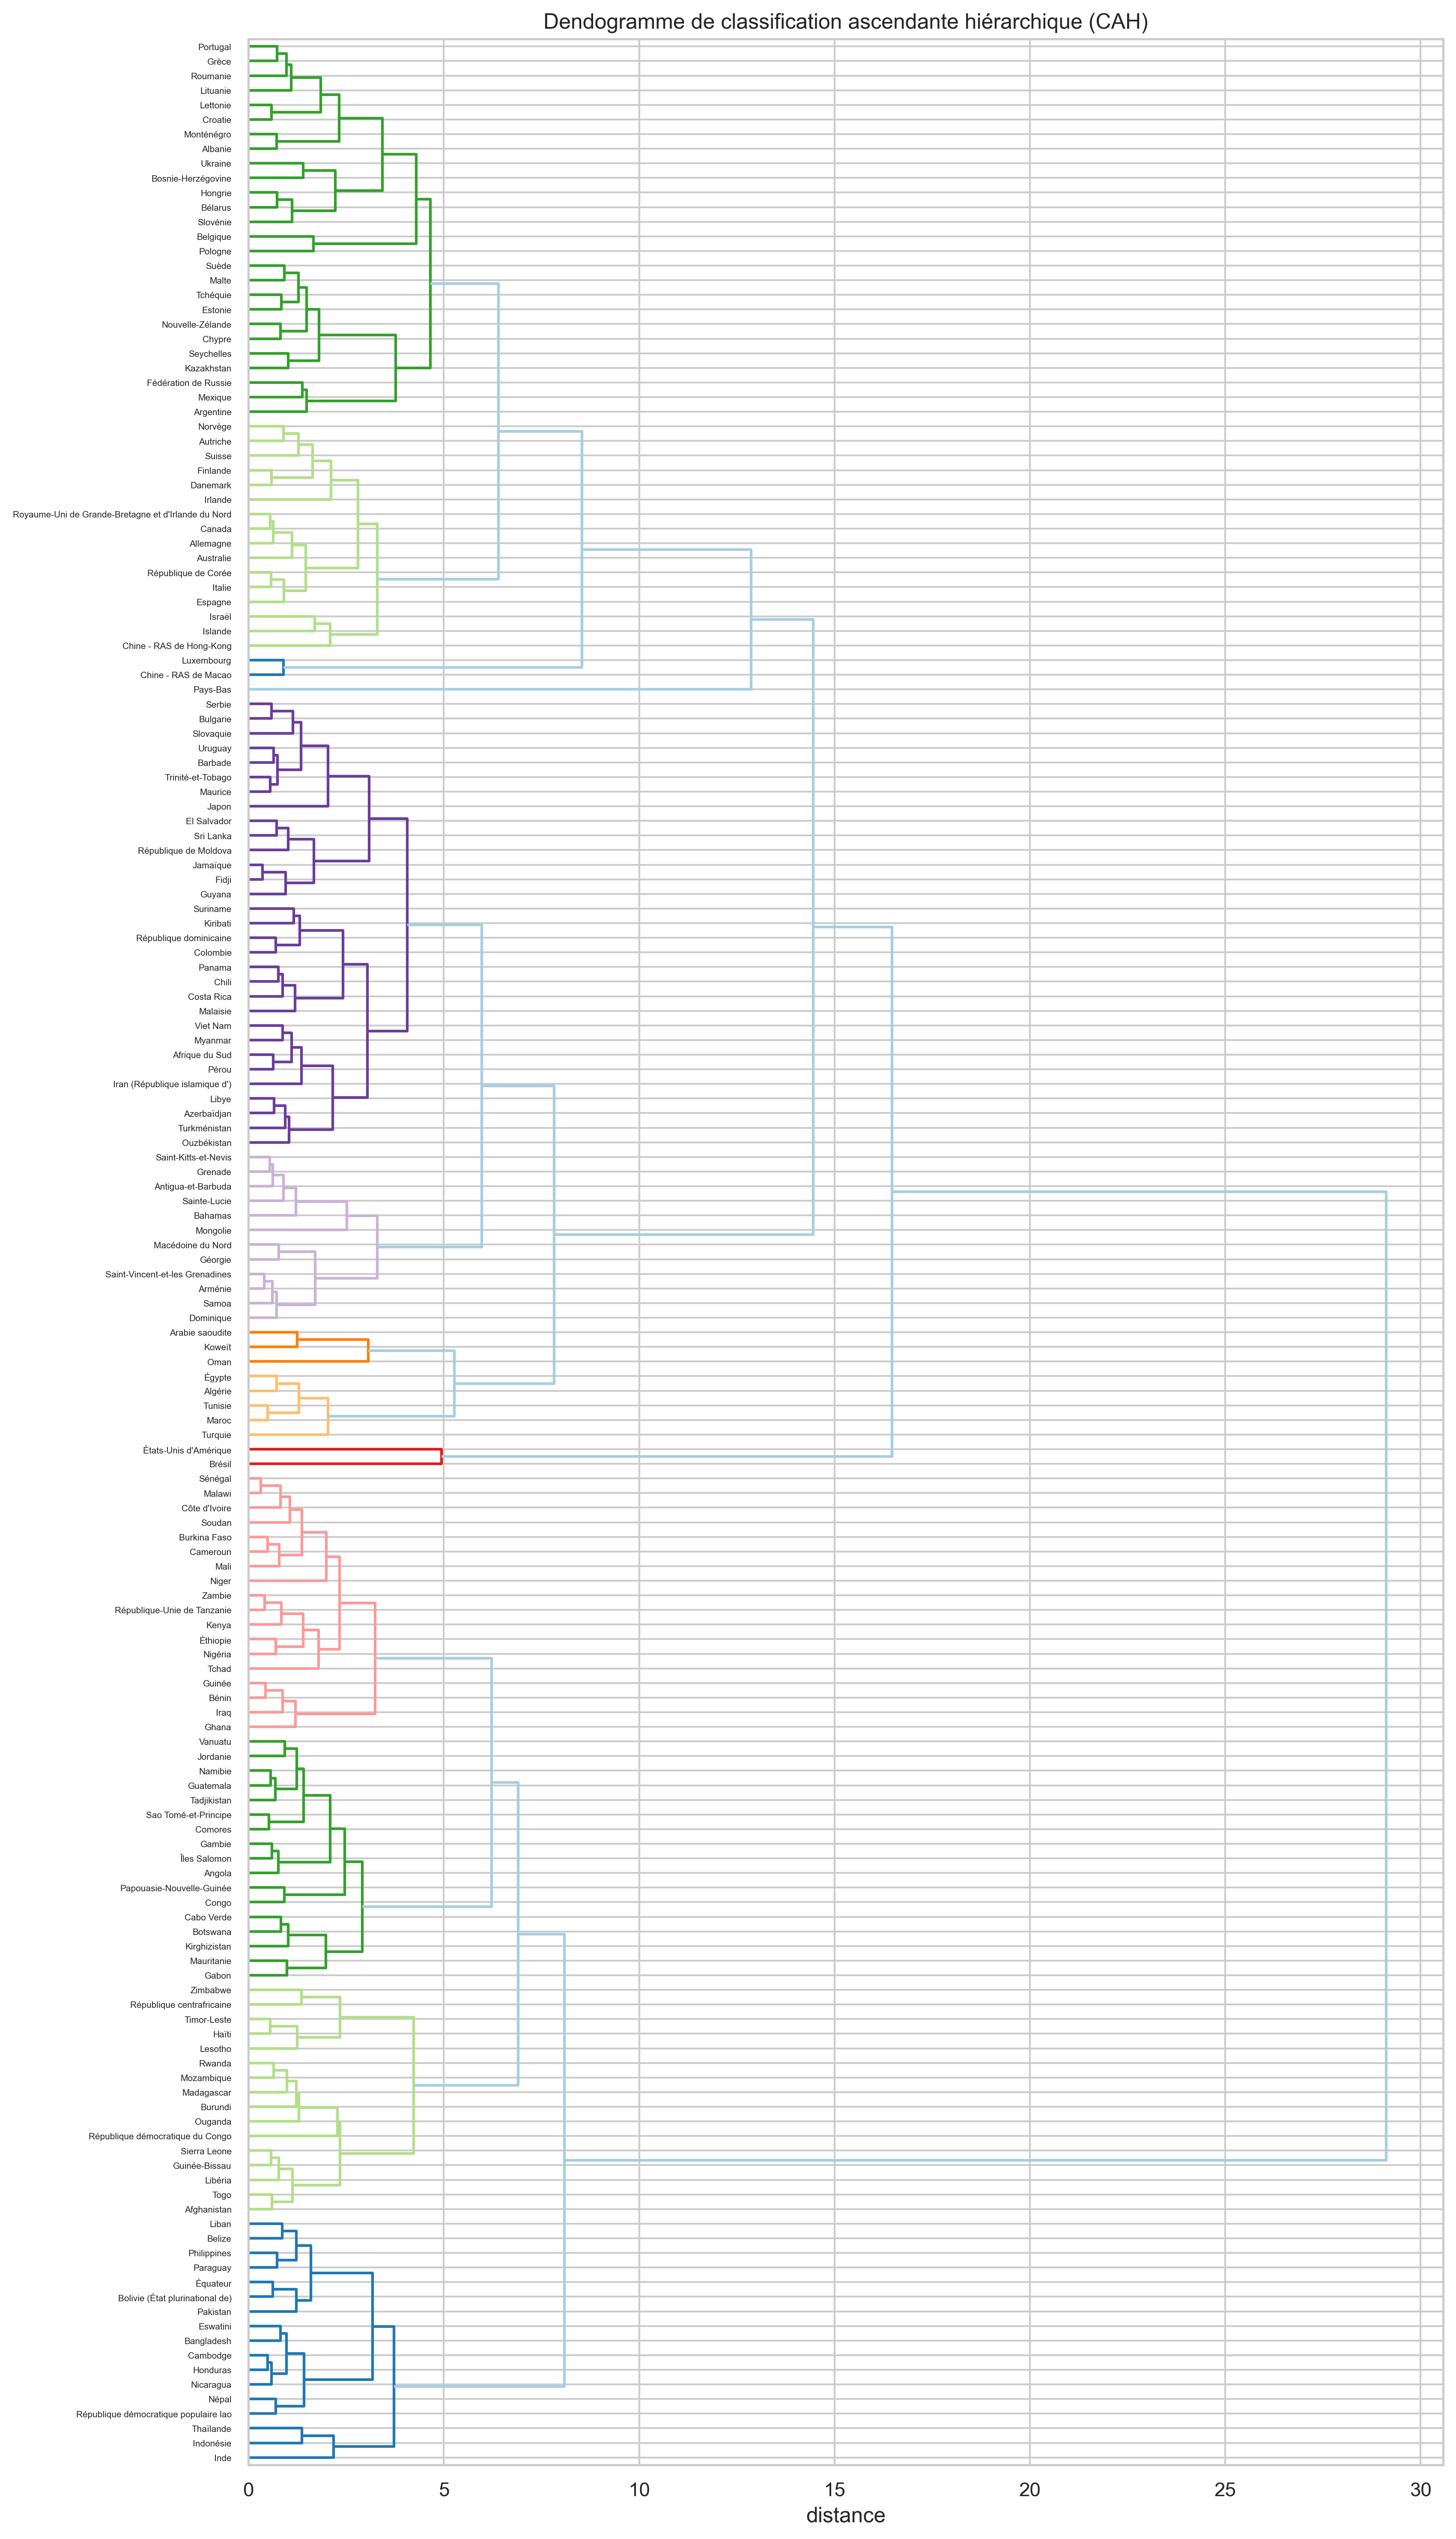

In [106]:
# Clustering hiérarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
z=linkage(X_cr, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    z,#Regroupement hiérarchique encodé avec la matrice renvoyée par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=5
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

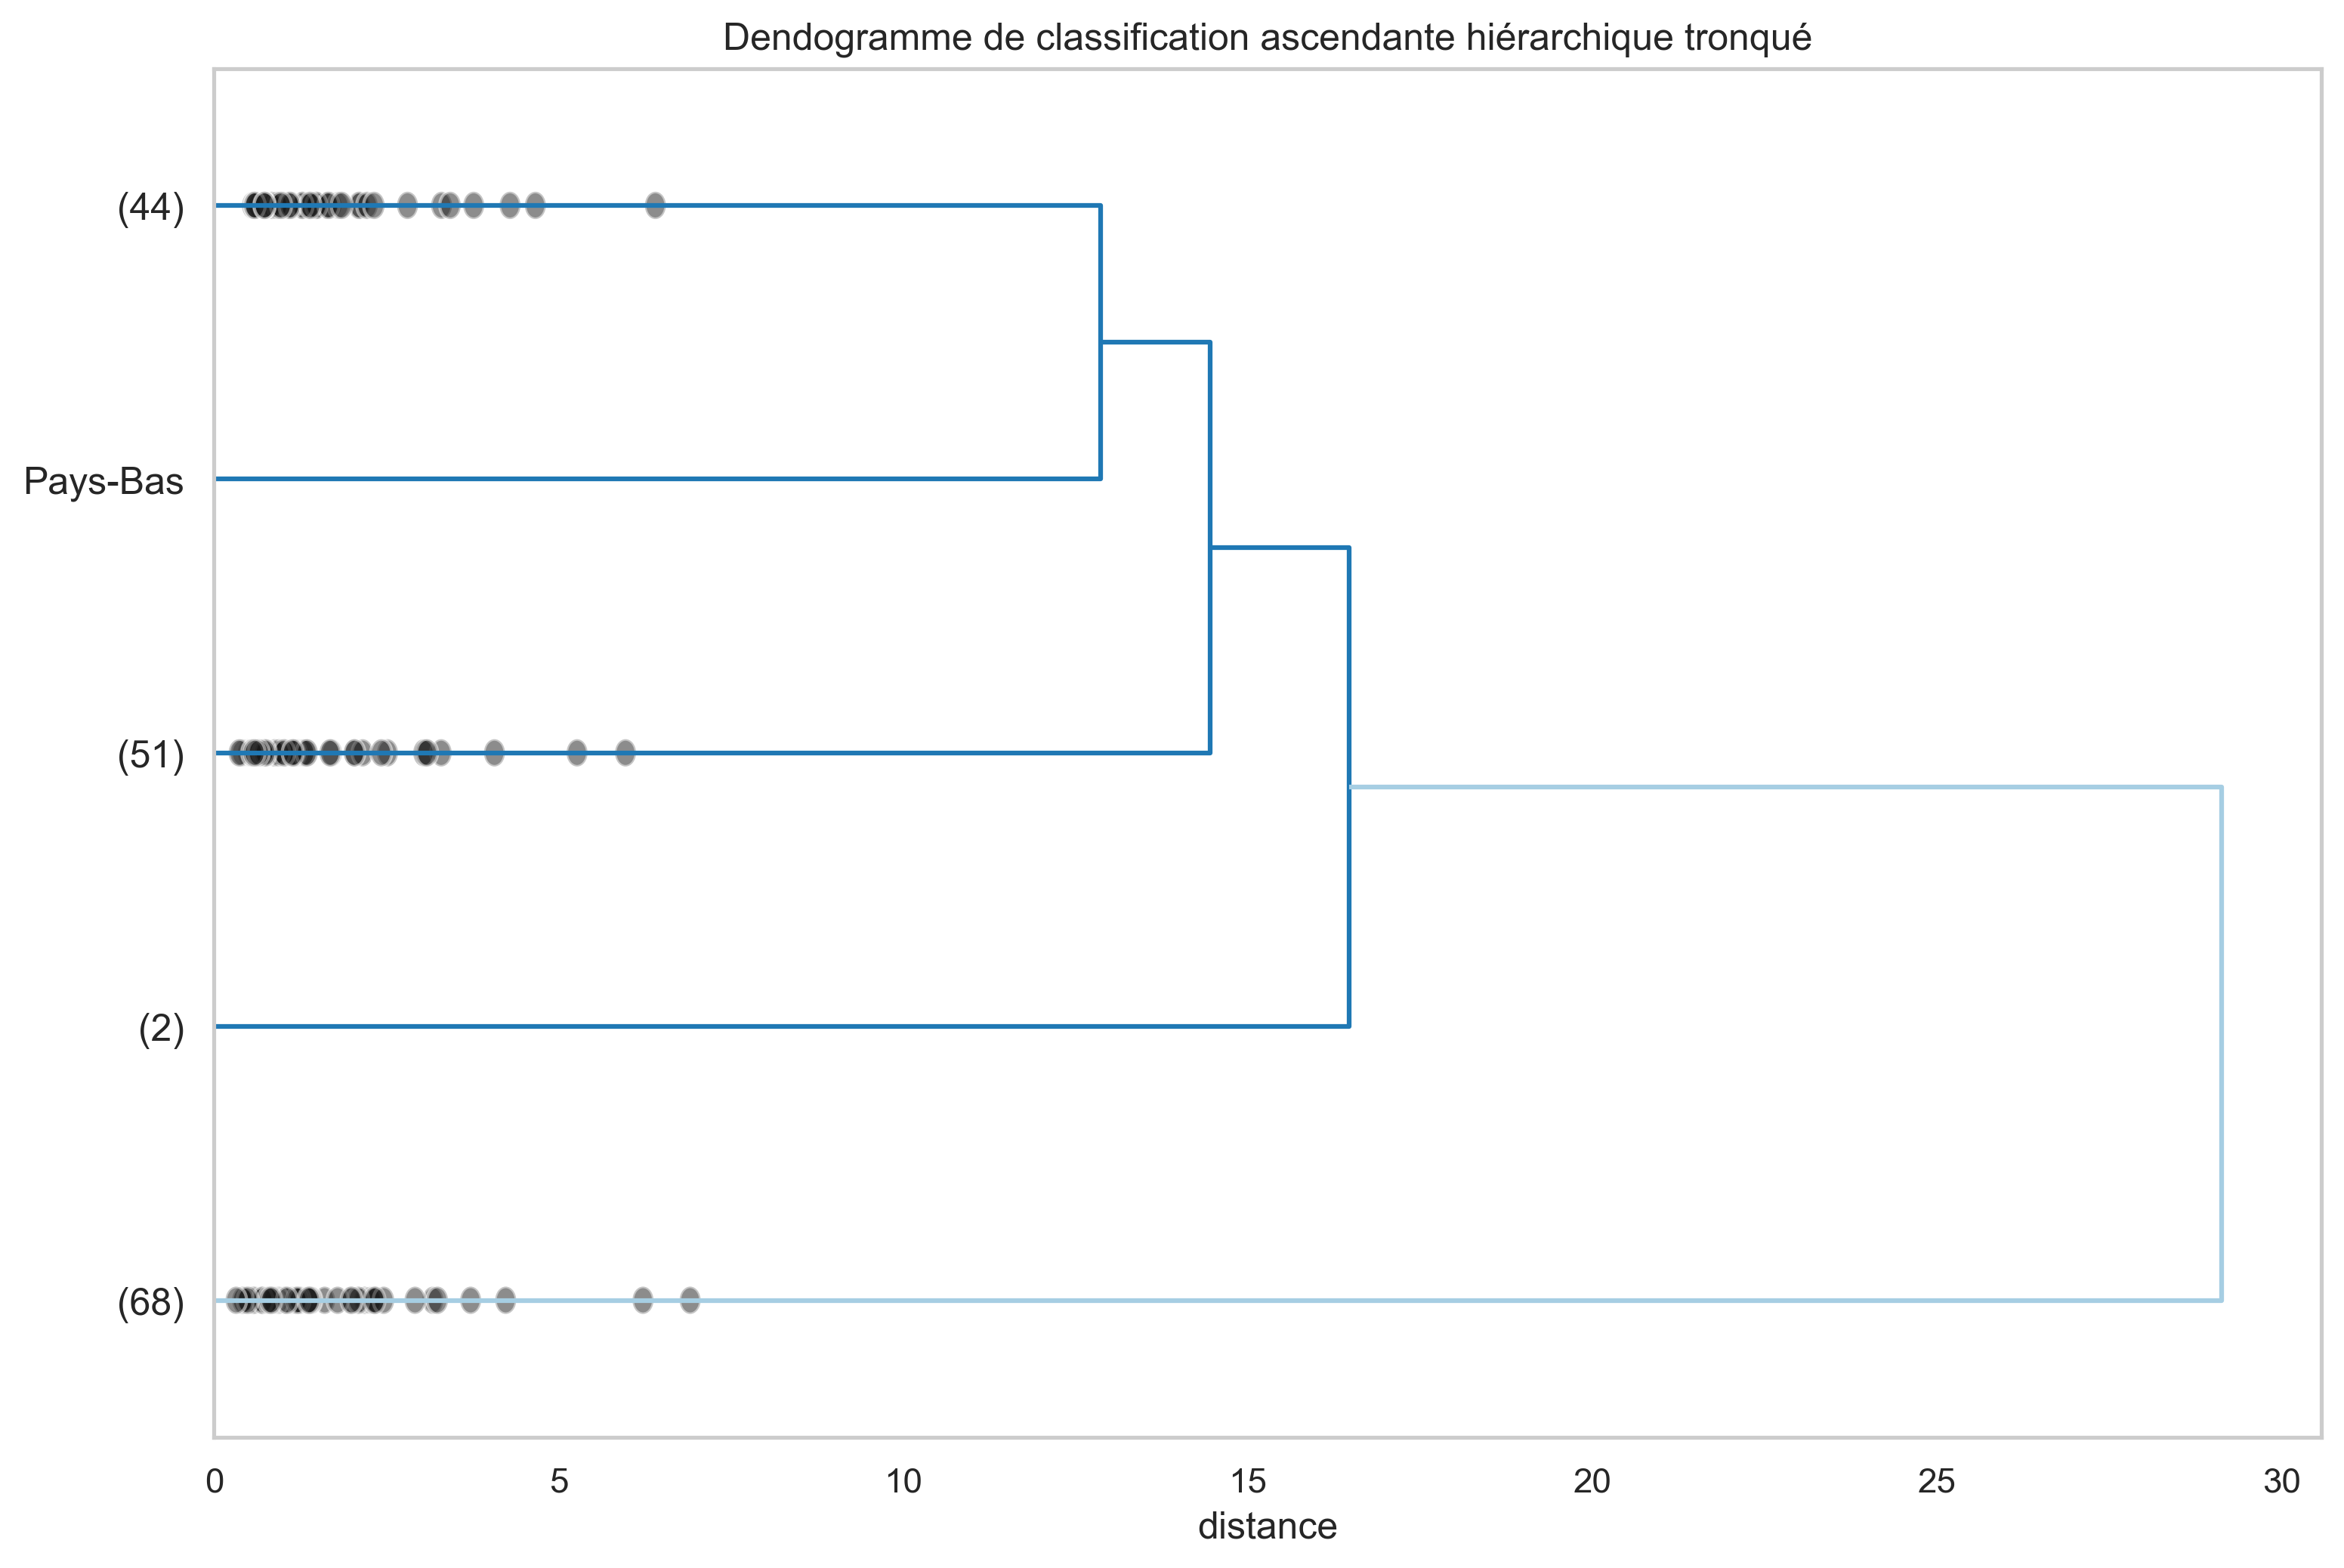

In [107]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique tronqué')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton formés dans la liaison sont les seuls nœuds non feuilles dans la liaison ; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



-> Il apparaît donc 5 groupes de pays, 


# Attribution des 5 groupes et World map de répartition

In [108]:
# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(linkage(X_cr, method='ward' ,metric='euclidean'), 5, criterion='maxclust')
#criterion , Critère à utiliser pour former des clusters plats. 
#maxclust : Trouve un seuil minimum r pour que la distance cophénétique entre deux observations originales quelconques dans le même cluster plat ne soit pas supérieure à r et que pas plus de t clusters plats soient formés.
clusters_cah

array([3, 1, 4, 3, 1, 3, 4, 4, 4, 3, 3, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4,
       1, 1, 3, 1, 3, 3, 1, 1, 3, 4, 3, 1, 4, 3, 3, 4, 1, 3, 3, 4, 3, 4,
       3, 1, 1, 4, 4, 1, 3, 4, 3, 1, 1, 3, 1, 1, 4, 4, 4, 4, 1, 1, 3, 1,
       4, 4, 4, 1, 4, 3, 3, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 3, 4, 4, 1,
       1, 3, 1, 4, 1, 3, 4, 3, 3, 1, 3, 1, 1, 5, 3, 1, 4, 1, 1, 1, 4, 1,
       3, 4, 1, 1, 3, 1, 4, 4, 1, 1, 1, 4, 1, 4, 3, 3, 3, 1, 3, 1, 4, 1,
       4, 3, 3, 4, 3, 1, 1, 4, 4, 3, 1, 1, 1, 3, 3, 3, 3, 1, 4, 4, 2, 1,
       3, 3, 3, 1, 3, 1, 1, 4, 4, 3, 4, 1], dtype=int32)

In [109]:
#index triés des groupes
idg = np.argsort(clusters_cah)
#Renvoie les indices qui trieraient un tableau.
idg

array([ 82, 100,  99,  97,  92,  90,  88,  87,  83,  81,  80,  76,  75,
        74,  73,  69,  65,  63,  62,  57,  56,  54, 103,  53, 105, 107,
       160, 159, 157, 153, 149, 144, 143, 142, 138, 137, 131, 129, 127,
       122, 120, 119, 118, 115, 113, 112, 109, 106,  49, 165,  22,  25,
        29,  23,  20,  19,  16,  33,  15,  13,  12,  28,  11,  38,  46,
        45,   4,   1, 152,  14, 158, 110, 156,   3, 163, 102, 114,  18,
        17,  26,  24, 155, 147, 124, 125, 126, 154, 128,   5, 133, 134,
       136,  10,   9, 141, 145, 146, 148,  27,  50,  96,  52,  55,  44,
        42,  64,  40,  71,  72,  98,  39,  36,  78,  35,  84,   0,  32,
        93,  95,  89,  30, 116,   6,  66,  41, 104,  43, 150, 151,  60,
         7,  59,  58,  94,  47,   2, 161, 162,  51,  61,   8, 140,  86,
       117,  85, 164, 121,  34, 123,  31,  79,  77,  67, 111, 130,  21,
       108,  48, 135,  70,  91,  68, 139,  37, 132, 101])

In [110]:

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","Zone"])
df_groupage_1["Zone"] = df_bilans_clus.index[idg]
df_groupage_1["groupe_cah"] = clusters_cah[idg]
df_groupage_1.head()

,groupe_cah,Zone
0,1,Lesotho
1,1,Népal
2,1,Namibie
3,1,Mozambique
4,1,Mauritanie


In [111]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_bilans_clus, df_groupage_1, on="Zone")
df_groupes_cah.to_csv('exports/df_groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪),groupe_cah
57,Honduras,10.770,977470.0,22732.20,34.200,5736.2,218.0,93.965517,1
73,Jordanie,18.579,923085.0,23257.80,39.470,10071.4,185.0,78.059072,1
11,Bangladesh,6.733,958490.0,22385.45,19.925,4753.7,260.0,100.000000,1
47,Allemagne,2.886,1299035.0,38047.60,60.150,53639.3,1544.0,90.186916,4
0,Arménie,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182,3


In [112]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
groupe_cah,,,,,,,
1,14.432647,9.078946e+05,22793.927941,28.350471,5215.195588,244.882353,69.663296
2,4.492000,1.297210e+06,38109.650000,62.250000,38697.400000,18497.500000,130.581503
3,6.109314,1.084801e+06,31088.696078,47.493706,18355.939216,456.215686,67.290100
4,2.398182,1.233518e+06,38580.251136,58.264682,43574.502273,674.000000,93.206459
5,1.506000,1.223845e+06,39460.150000,64.351000,56629.100000,1036.000000,695.302013


/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python

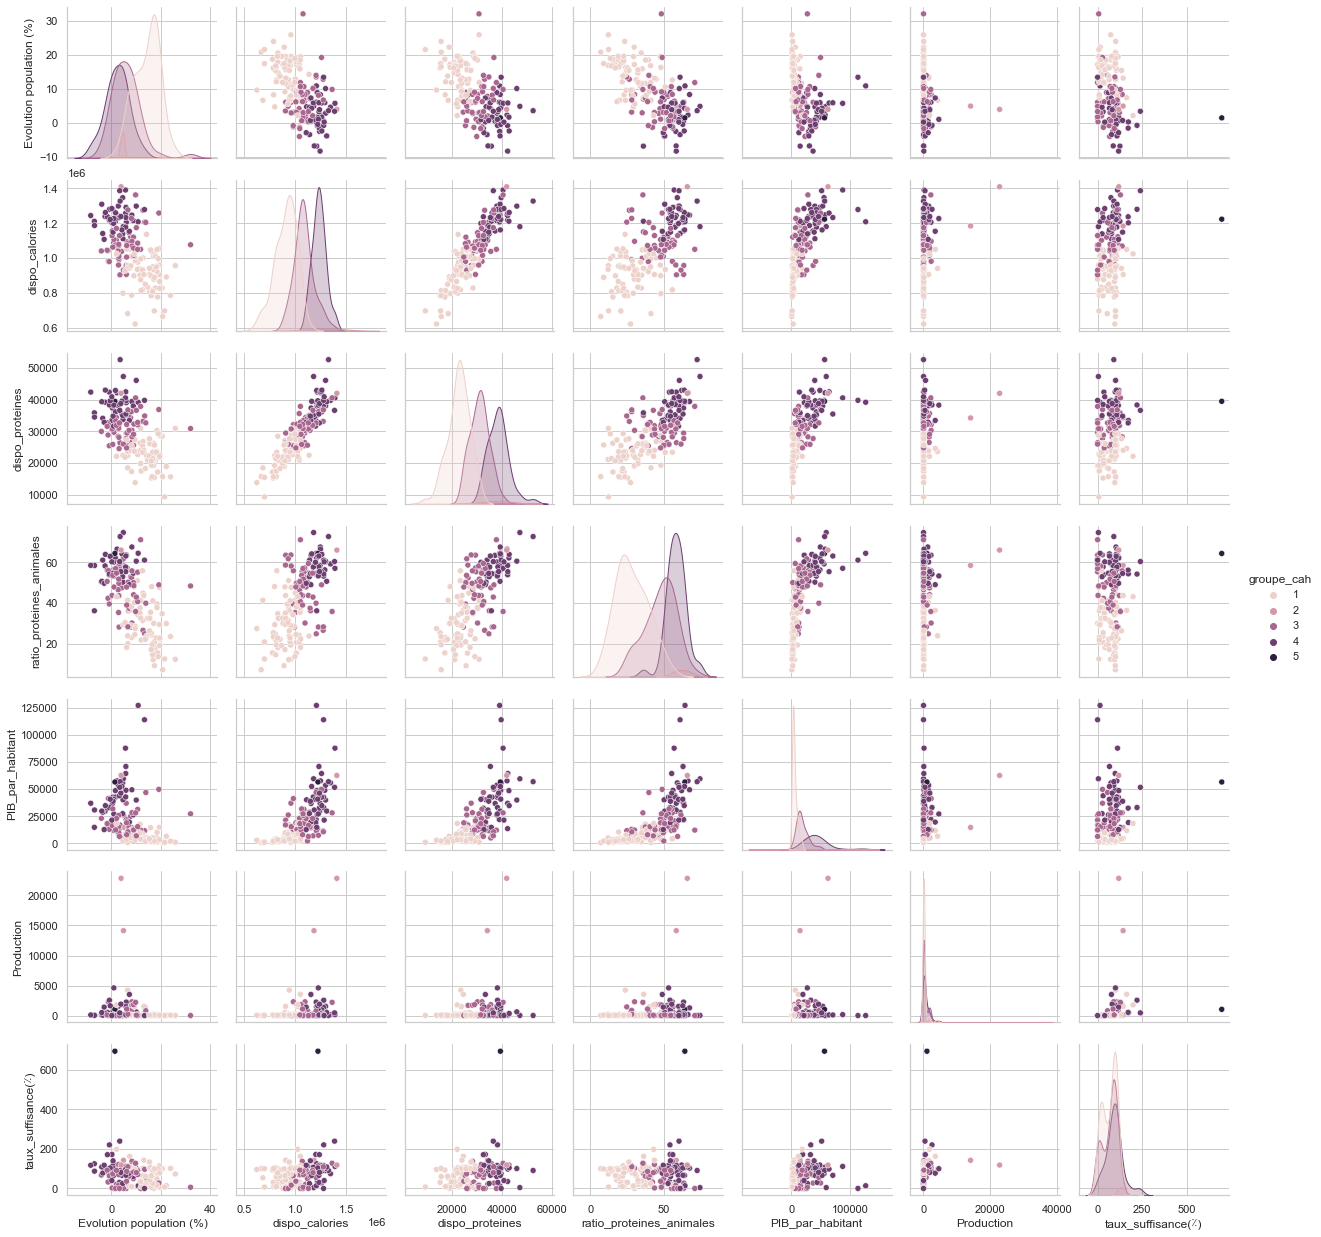

In [113]:
# Pairplot avec coloration des groupes
sns.pairplot(df_groupes_cah[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales", "groupe_cah",'PIB_par_habitant','Production','taux_suffisance(٪)']], hue="groupe_cah")


In [114]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()




,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
groupe_cah,,,,,,,
1,14.432647,9.078946e+05,22793.927941,28.350471,5215.195588,244.882353,69.663296
2,4.492000,1.297210e+06,38109.650000,62.250000,38697.400000,18497.500000,130.581503
3,6.109314,1.084801e+06,31088.696078,47.493706,18355.939216,456.215686,67.290100
4,2.398182,1.233518e+06,38580.251136,58.264682,43574.502273,674.000000,93.206459
5,1.506000,1.223845e+06,39460.150000,64.351000,56629.100000,1036.000000,695.302013


In [115]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]

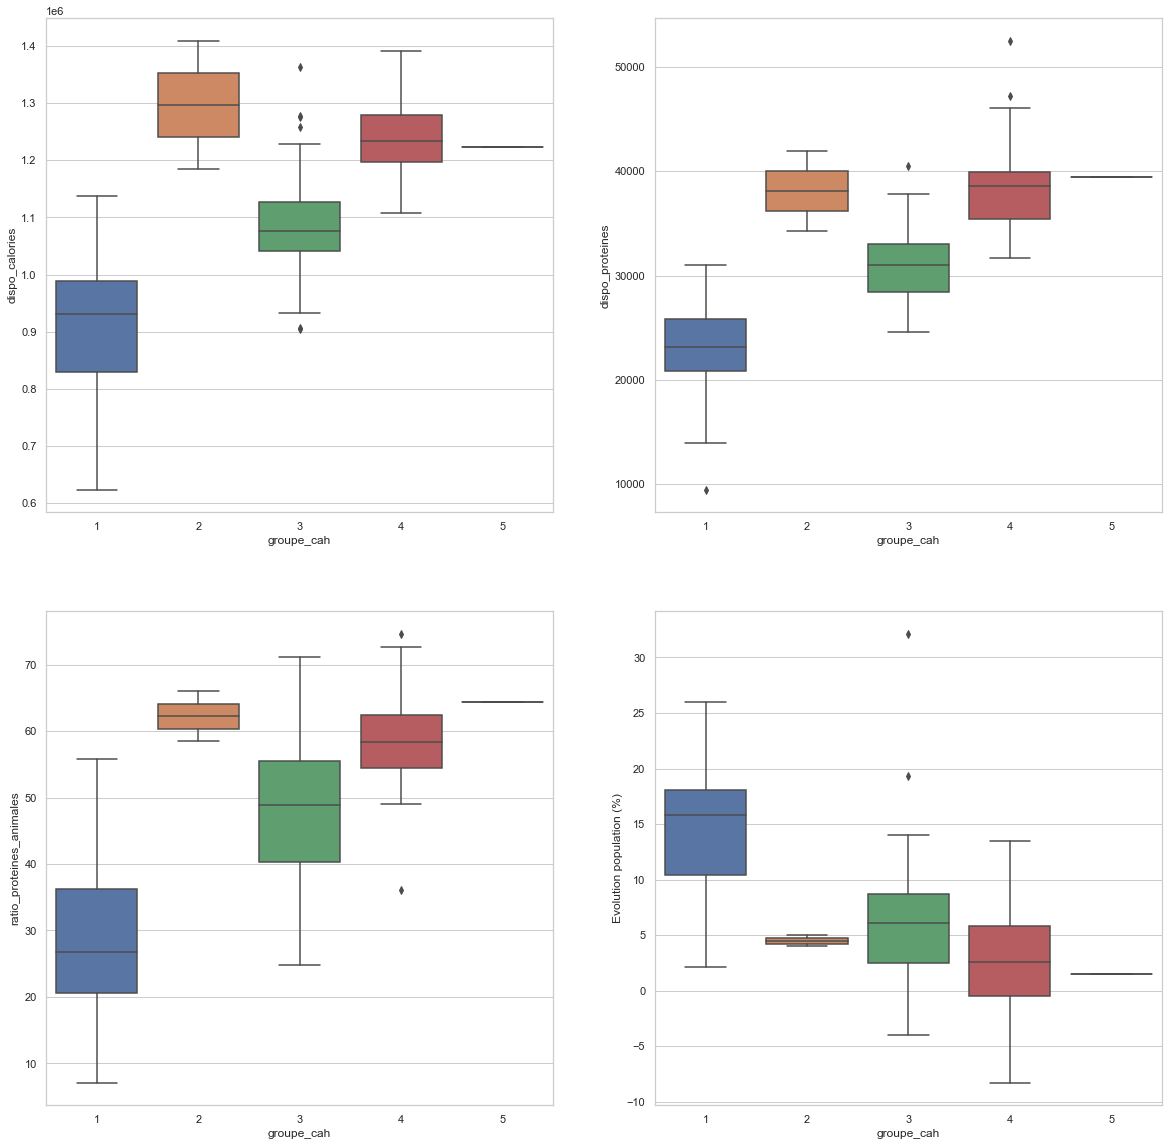

In [116]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Evolution population (%)')



plt.savefig("exports/boxplot_dendogramme1.png")

plt.show(block=False)

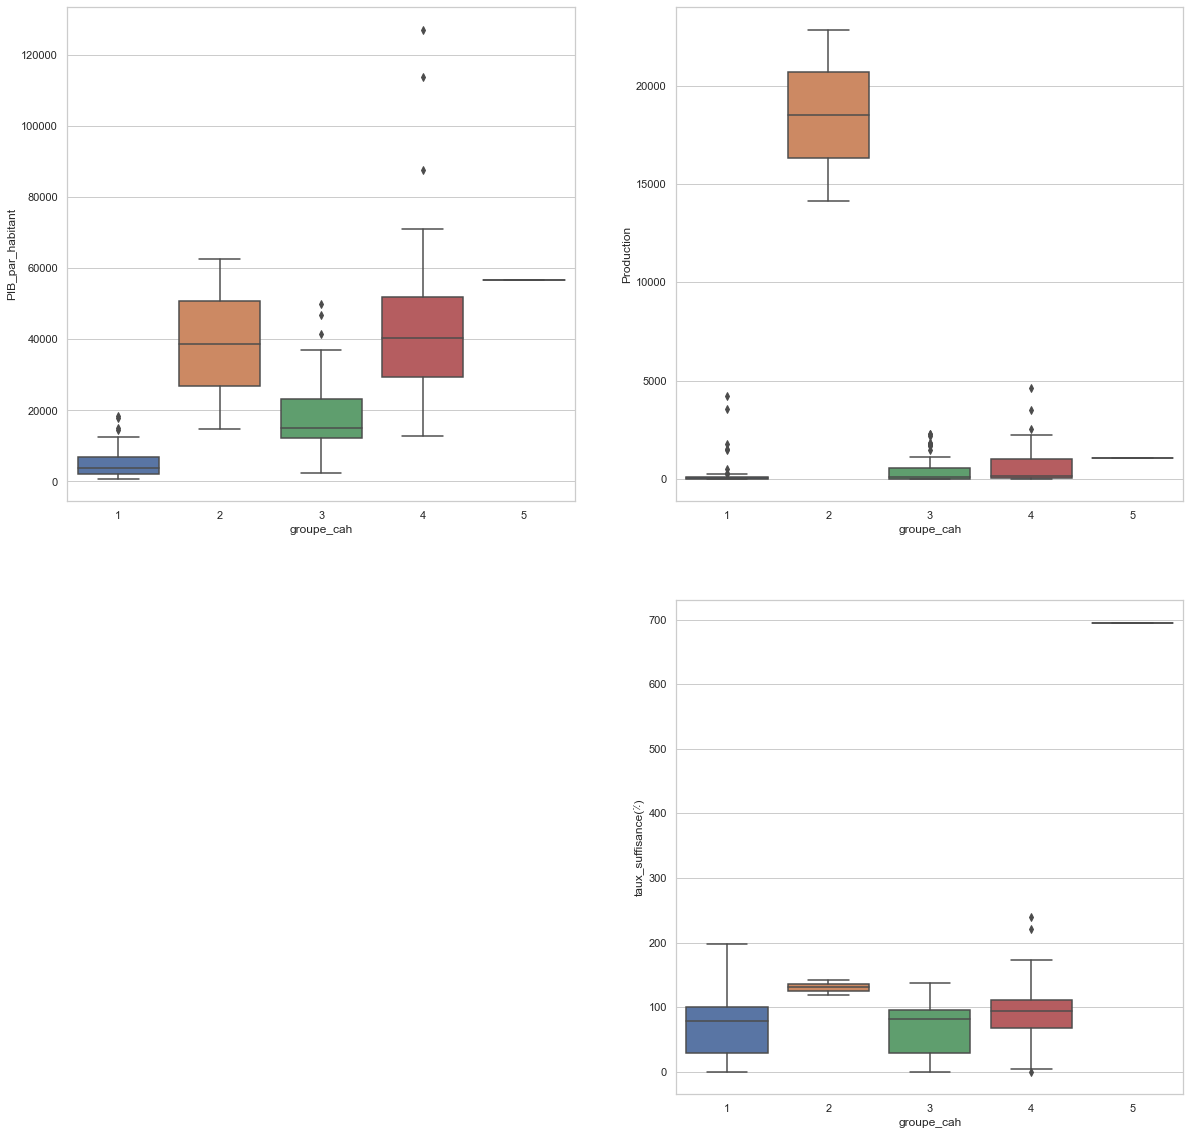

In [117]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB_par_habitant')



plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Production')




plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_suffisance(٪)')


plt.savefig("exports/boxplot_dendogramme.png")

plt.show(block=False)

In [118]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([4]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah.shape

(44, 9)

In [119]:
#Pays du groupe 1 et 2 identifiés comme potentiellement intéressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')



groupe 1
----------
['Afghanistan' 'Angola' 'Bangladesh' 'Bolivie (État plurinational de)'
 'Botswana' 'Belize' 'Îles Salomon' 'Burundi' 'Cameroun' 'Cabo Verde'
 'République centrafricaine' 'Tchad' 'Comores' 'Congo' 'Bénin' 'Équateur'
 'Gabon' 'Gambie' 'Ghana' 'Guatemala' 'Guinée' 'Haïti' 'Honduras' 'Inde'
 'Indonésie' 'Iraq' "Côte d'Ivoire" 'Jordanie' 'Kirghizistan' 'Kenya'
 'Cambodge' 'République démocratique populaire lao' 'Liban' 'Lesotho'
 'Libéria' 'Madagascar' 'Malawi' 'Mali' 'Mauritanie' 'Mozambique'
 'Namibie' 'Népal' 'Vanuatu' 'Nicaragua' 'Niger' 'Nigéria' 'Pakistan'
 'Papouasie-Nouvelle-Guinée' 'Paraguay' 'Philippines' 'Guinée-Bissau'
 'Timor-Leste' 'Zimbabwe' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Sierra Leone' 'Tadjikistan' 'Eswatini' 'République-Unie de Tanzanie'
 'Thaïlande' 'Togo' 'Ouganda' 'Burkina Faso' 'Éthiopie'
 'République démocratique du Congo' 'Zambie' 'Soudan']
------------------------------------------------------------
-----------------------------------

Les clusters 1 et 2, situés majoritairement en Afrique, sont ceux qui ont les démographies les plus fortes et les PIB/habitants les plus faibles.

Les cluster 4 et 5 reflètent au contraire des pays en moyenne plus riches comme les USA ou la plupart des pays européens.

Le cluster 3 est dans une position intermédiaire.

Concernant les disponibilités alimentaires, celles-ci suivent les même tendances que le PIB. Les pays les plus pauvres ont un moindre accès à l’alimentation. Cela fait écho aux problème de sous-nutrition mis en évidence lors du projet 3.

La consommation de protéines animales confirme le partitionnement, avec une forte alimentation carnée de la part des clusters 5 et 3.

En revanche, les deux dernières variables évoluent bien différemment. Nous voyons que les clusters 4 et 5 sont ceux qui importent beaucoup plus de viandes de volailles qu’ils n’en produisent.

Le groupe 4 est celui qui dépend le plus de l'importation.

Le groupe 5 est l'un des plus grands pays producteurs de poulet.


En conclusion pour cette première division, 64 pays deviendraient vraisemblablement une cible appropriée pour l'entreprise. La demande sera présente dans ces pays.
Appliquons une autre méthode, celle des K-Means, afin de pouvoir comparer cette première sélection...

# Application de l'algorithme du K-Means


Le clustering K-Means est une méthode de clustering simple mais puissante qui crée 𝑘 segments distincts des données où la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer différentes valeurs de 𝑘 et calculer l'inertie, ou score de distorsion, pour chaque modèle.
 L'inertie mesure la similarité du cluster en calculant la distance totale entre les points de données et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance à avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La méthode de coude nous aidera pour identifier les clusters.


•Nous choisissons 'K' manuellement, par visualisation.

• Calculer les distances entre les points d'un cluster (With-in Cluster Sum of Squares "WCSS").

• Si nous minimisons 'WCSS', nous avons atteint la solution de clustering parfaite.


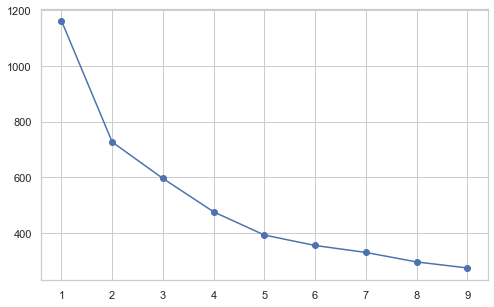

In [123]:
from sklearn.cluster import KMeans
from sklearn import cluster


K=range(1,10)
k_means = []
#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in K:
    #pour chaque k, on crée un modèle et on l’ajuste
    km=KMeans(n_clusters=k,init="k-means++").fit(X_cr)
     #on stocke l’inertie associée
    k_means.append(km.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [124]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

,groupe_km,WSS
0,1,1162.000000
1,2,726.092716
2,3,595.202538
3,4,475.055702
4,5,391.753422
5,6,354.214734
6,7,329.210465
7,8,295.061309
8,9,273.449302


Idéalement, pour optimiser et ne pas perdre trop d'informations, il est conseillé de choisir k = 5 .
 Un clustering  en 5 permettra de de comparer le partitionnement avec les groupes de la classification hiérarchique. Il est pertinent de comparer les deux méthodes sur le même nombre de clusters.



In [127]:

#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_cr)
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans5 = cls5.labels_

cls5.cluster_centers_ 
#Afficher la position finale du centroïde


array([[-9.54393197e-01,  1.02654744e+00,  1.25936232e+00,
         1.34394532e+00,  1.75252579e+00,  1.77372802e-01,
         9.37220598e+00],
       [-4.52330773e-01,  8.85418689e-02,  6.74813772e-02,
         2.77025591e-01, -1.96502665e-01, -4.22098771e-02,
        -4.06874404e-02],
       [ 9.49954471e-01, -9.47132427e-01, -9.46202158e-01,
        -9.97547084e-01, -7.32566768e-01, -2.29270260e-01,
        -2.50943183e-01],
       [-5.46225700e-01,  1.47298760e+00,  1.08309086e+00,
         1.21300842e+00,  8.91452426e-01,  8.16454695e+00,
         7.74958847e-01],
       [-6.84774566e-01,  1.15452484e+00,  1.19628345e+00,
         9.63306536e-01,  1.26050719e+00,  2.76470475e-04,
         1.62539450e-01]])

On obtient donc un tableau de 5 lignes et 7 colonnes, pourquoi ?
Nous avons cinq groupes et sept variables.
**Pour réduire les dimensions, nous avons besoin de pca**

# Visualisation des clusters en ACP pour la projection des données


Le principe de **la réduction de dimension** est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos données sur des axes appelés Composantes Principales, en cherchant à minimiser la distance entre nos points et leur projections. De cette manière on réduit la dimension préservant au maximum la variance de nos données. Pour **Préserver un maximum de variance pour optenir la projection qu'il soit la plus fidèle possible à nos données.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire ça dans point de vue mathématique on
 1. On calcule la matrice de covariance des données 
 2. On détermine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les données sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appréhender le "comportement" des différents groupes.**

PCA est un transformer ! 
1. Définir le nombre de composantes 
2. Transformer les données avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos données? et bien :
1. Celui dans lequel vous cherchez à visualiser vos données dans un espace de 2d ou 3D ,pour ça c'est très simple, le nombre de composants doit être égale à deux ou trois
2. Celui dans lequel vous cherchez à compresser vos données pour accélérer l'apprentissage de la machine sur des taches de classification ou de régression, pour ça il faut choisir le nombre de composantes de telle sorte à préserver entre 95 et 99 % de la variance de vos données.

### Définir le nombre de composantes 

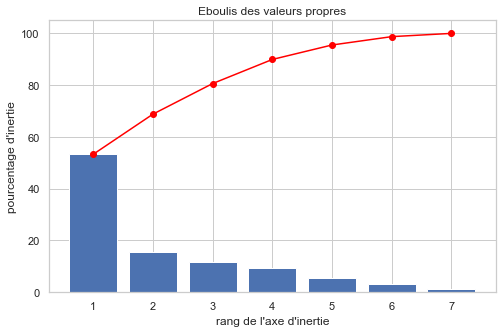

[ 53.31632237  68.81208828  80.62486244  89.93293024  95.51596267
  98.74552134 100.        ]


array([53.31632237, 15.49576591, 11.81277416,  9.3080678 ,  5.58303243,
        3.22955867,  1.25447866])

In [128]:
import pca as pca
from sklearn import decomposition
#Représentation de la variance expliquée 
model_pca = decomposition.PCA().fit(X_cr)

#nous allons examiner quel est le pourcentage de variance préserver pour chacune de nos composantes.
scree = model_pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree




Environ 70 % de la variance des données s'explique par ces deux premières composantes.

La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


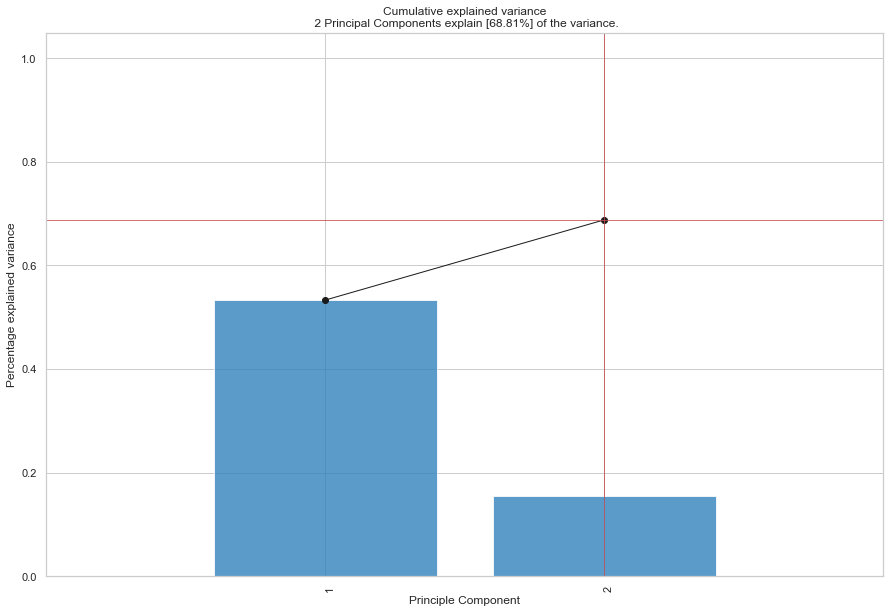

<Figure size 576x360 with 0 Axes>

[ 53.31632237  68.81208828  80.62486244  89.93293024  95.51596267
  98.74552134 100.        ]


array([53.31632237, 15.49576591, 11.81277416,  9.3080678 ,  5.58303243,
        3.22955867,  1.25447866])

In [129]:
from pca import pca
model_pca = pca(n_components=2)

results = model_pca.fit_transform(X_cr)

fig, ax = model_pca.plot()
plt.show()

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree

[pca] >Plot PC1 vs PC2 with loadings.


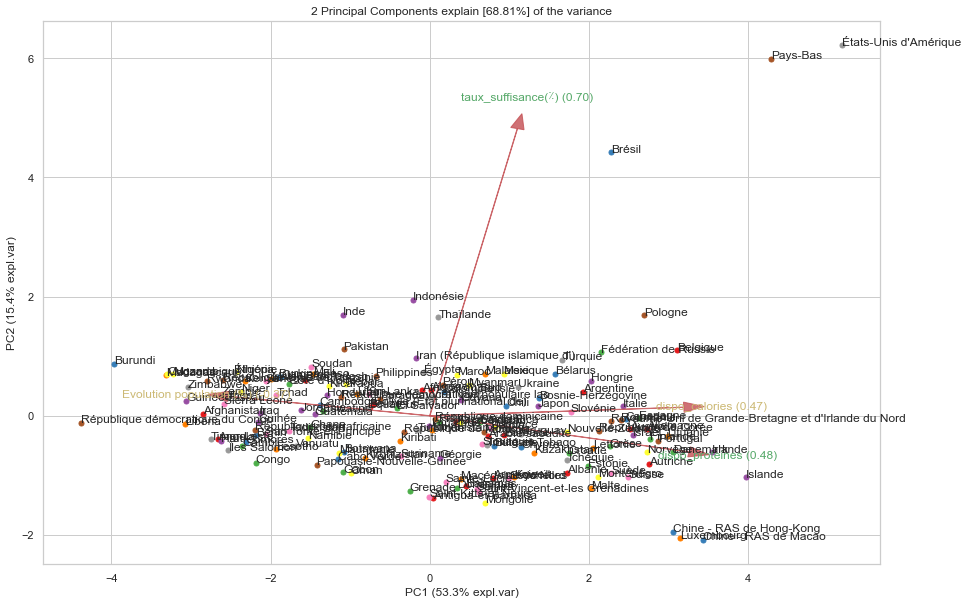

In [130]:
fig, ax = model_pca.biplot(n_feat=4, legend=None)

In [131]:
model_pca

In [132]:
model_pca.transform(X_cr)

[pca] >Processing dataframe..


,PC1,PC2
Arménie,0.792494,-1.036649
Afghanistan,-2.846602,0.032040
Albanie,1.728456,-0.956359
Algérie,0.015194,0.440320
Angola,-2.658743,-0.391749
...,...,...
Belgique,3.112631,1.097987
Luxembourg,3.145473,-2.059342
Serbie,0.766327,-0.204598
Monténégro,2.117345,-1.025718


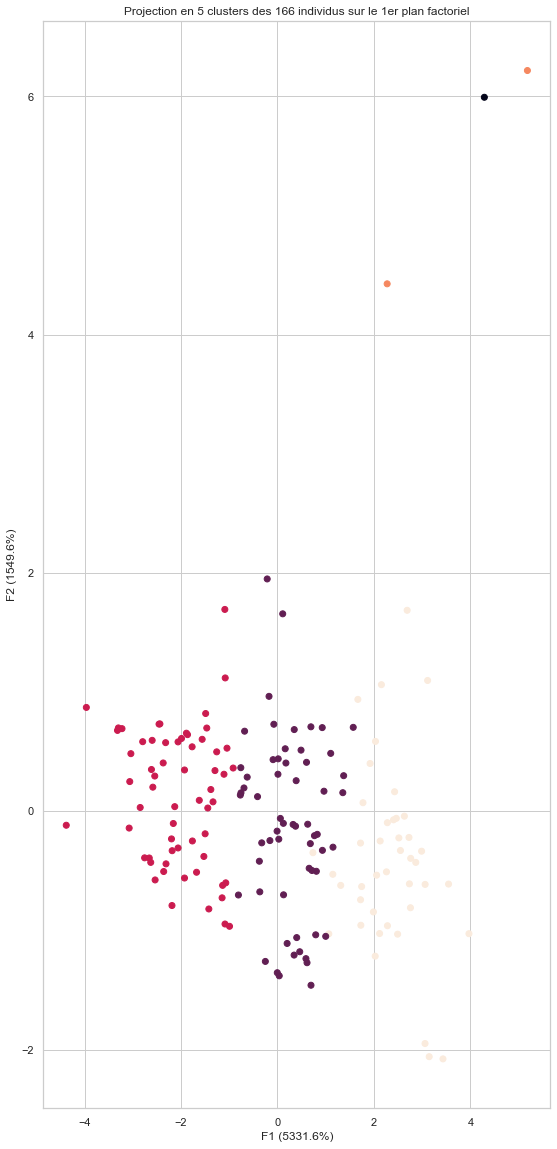

In [154]:
#Coordonnées factorielles 
model_pca = decomposition.PCA().fit(X_cr)
X_projected = model_pca.transform(X_cr)

plt.figure(figsize=(20,20))
plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls5.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

L'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifiés lors du précédent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est nécessaire de caractériser chacun de ces groupes selon nos 8 variables. La position des centroïdes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de procéder en K-Means, afin d'obtenir directement des valeurs centrées et réduites, facilitant l'analyse. ⬇️

In [135]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls5.cluster_centers_
centroids


array([[-9.54393197e-01,  1.02654744e+00,  1.25936232e+00,
         1.34394532e+00,  1.75252579e+00,  1.77372802e-01,
         9.37220598e+00],
       [-4.52330773e-01,  8.85418689e-02,  6.74813772e-02,
         2.77025591e-01, -1.96502665e-01, -4.22098771e-02,
        -4.06874404e-02],
       [ 9.49954471e-01, -9.47132427e-01, -9.46202158e-01,
        -9.97547084e-01, -7.32566768e-01, -2.29270260e-01,
        -2.50943183e-01],
       [-5.46225700e-01,  1.47298760e+00,  1.08309086e+00,
         1.21300842e+00,  8.91452426e-01,  8.16454695e+00,
         7.74958847e-01],
       [-6.84774566e-01,  1.15452484e+00,  1.19628345e+00,
         9.63306536e-01,  1.26050719e+00,  2.76470475e-04,
         1.62539450e-01]])

In [136]:
pd.DataFrame(centroids, columns=df_bilans_clus.columns)

,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪)
0,-0.954393,1.026547,1.259362,1.343945,1.752526,0.177373,9.372206
1,-0.452331,0.088542,0.067481,0.277026,-0.196503,-0.042210,-0.040687
2,0.949954,-0.947132,-0.946202,-0.997547,-0.732567,-0.229270,-0.250943
3,-0.546226,1.472988,1.083091,1.213008,0.891452,8.164547,0.774959
4,-0.684775,1.154525,1.196283,0.963307,1.260507,0.000276,0.162539


In [142]:
#Index trié des clusters
idk = np.argsort(cls5.labels_)
#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_bilans_clus.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'groupe_km'})
df_cls5

,groupe_km,Zone
0,0,Pays-Bas
1,1,Arménie
2,1,Sainte-Lucie
3,1,Grenade
4,1,Saint-Vincent-et-les Grenadines
...,...,...
161,4,Estonie
162,4,Espagne
163,4,Danemark
164,4,Italie


In [143]:
#Intégration des clusters dans notre dataframe "df_cls5" par la méthode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_bilans_clus, df_cls5, on='Zone')
df_cls5

,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪),groupe_km
0,Arménie,2.076,1103030.0,34415.85,56.061,13653.8,12.0,21.818182,1
1,Afghanistan,17.887,829645.0,20918.15,18.042,2065.0,28.0,41.791045,2
2,Albanie,-0.788,1218370.0,42347.30,53.844,13671.5,12.0,35.294118,4
3,Algérie,12.881,1274945.0,33156.60,26.519,11510.6,291.0,101.393728,1
4,Angola,22.331,892425.0,19012.85,29.833,6670.3,49.0,14.984709,2
...,...,...,...,...,...,...,...,...,...
161,Belgique,3.455,1387000.0,36624.10,60.375,51742.7,448.0,239.572193,4
162,Luxembourg,13.486,1278960.0,39766.75,61.083,113940.0,0.0,0.000000,4
163,Serbie,-1.644,1045725.0,31601.70,50.578,18292.2,104.0,92.857143,1
164,Monténégro,0.262,1284800.0,40876.35,60.246,21533.9,4.0,40.000000,4


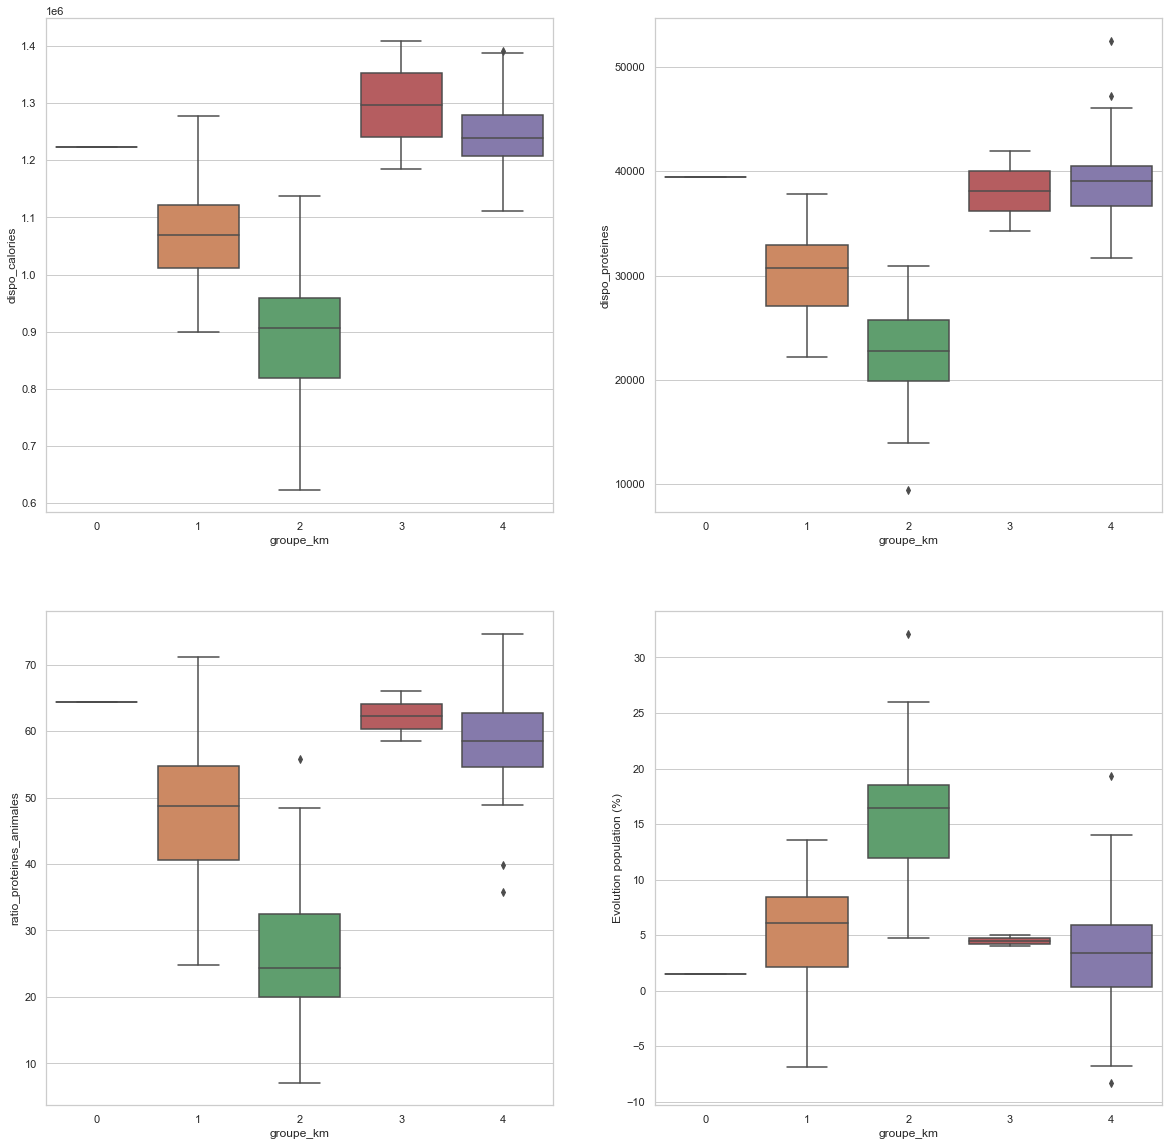

In [144]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='Evolution population (%)')

plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

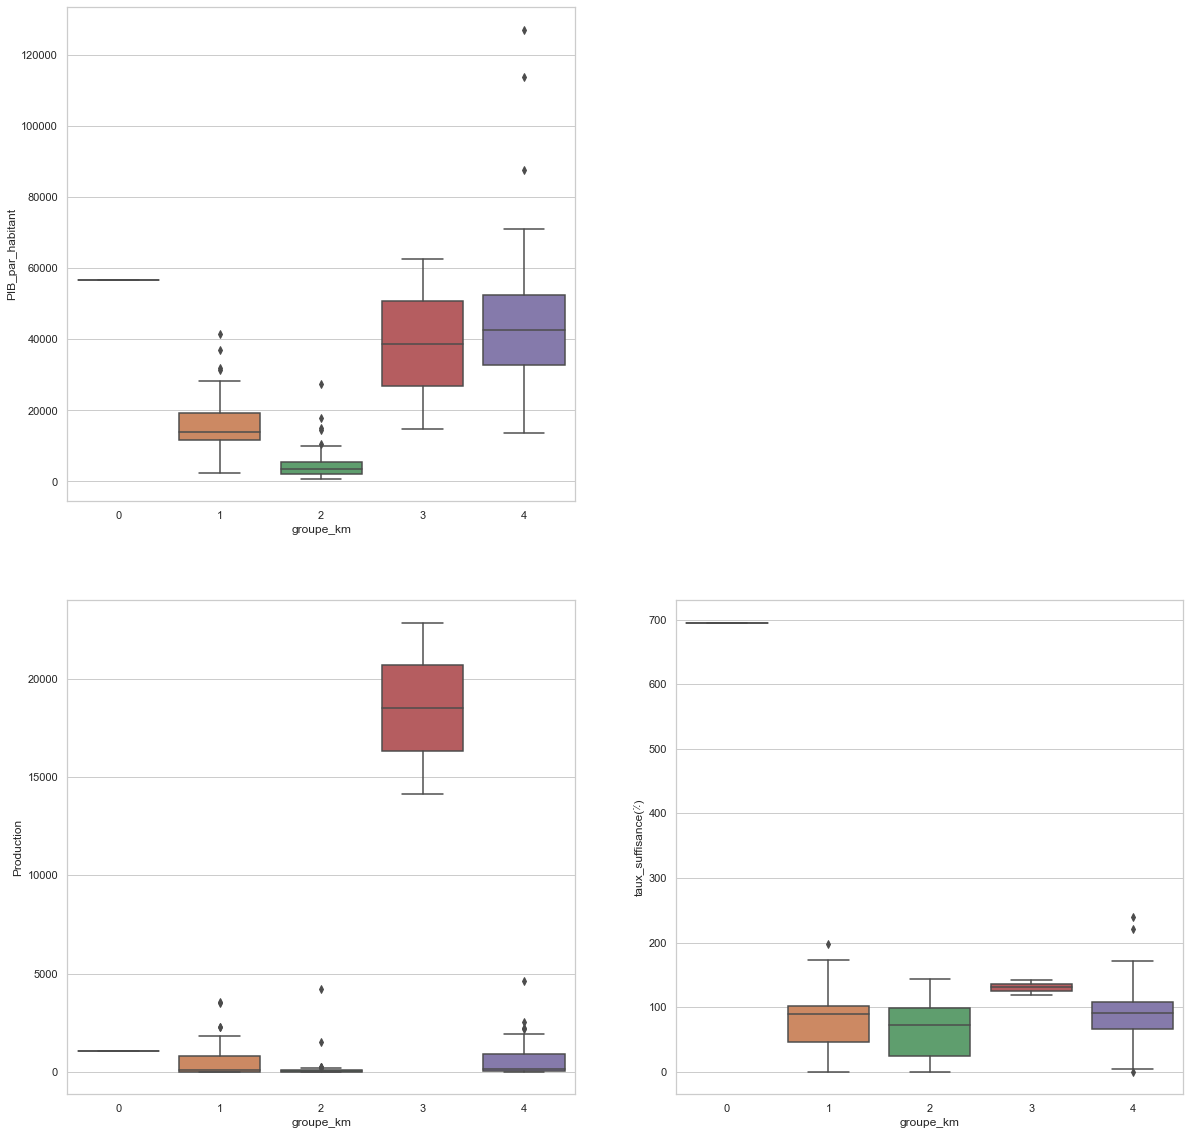

In [145]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='PIB_par_habitant')


plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='Production')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_suffisance(٪)')

plt.savefig("exports/boxplot_dendogramme4.png")
plt.show(block=False)





En se basant sur les mêmes critères que lors de la sélection des pays par CAH (évolution importante de la population et bilan alimentaire trop faible), les clusters Kmeans à selectionner sont  clusters0 et clusters 4

In [146]:
#Affichage des pays retenus dans ce clustering
#Sélection selon l'importance du ratio des protéines animales et dispo. calorique en réponse 
#d'une problématique ciblée sur le régime alimentaire des pays
print('groupe 0')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 0]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 1')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 1]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 2')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 2]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 3')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 3]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 4')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 4]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')




groupe 0
----------
['Pays-Bas']
------------------------------------------------------------
------------------------------------------------------------
groupe 1
----------
['Arménie' 'Algérie' 'Antigua-et-Barbuda' 'Bahamas' 'Barbade'
 'Bolivie (État plurinational de)' 'Belize' 'Bulgarie' 'Myanmar'
 'Sri Lanka' 'Chili' 'Colombie' 'Costa Rica' 'Azerbaïdjan' 'Dominique'
 'République dominicaine' 'Bélarus' 'Équateur' 'Égypte' 'El Salvador'
 'Fidji' 'Géorgie' 'Bosnie-Herzégovine' 'Kiribati' 'Grenade' 'Guyana'
 'Indonésie' "Iran (République islamique d')" 'Jamaïque' 'Japon'
 'Kirghizistan' 'Libye' 'Malaisie' 'Maurice' 'Mexique' 'Mongolie' 'Maroc'
 'République de Moldova' 'Macédoine du Nord' 'Panama' 'Paraguay' 'Pérou'
 'Philippines' 'Saint-Kitts-et-Nevis' 'Sainte-Lucie'
 'Saint-Vincent-et-les Grenadines' 'Seychelles' 'Slovaquie'
 'Afrique du Sud' 'Suriname' 'Turkménistan' 'Thaïlande'
 'Trinité-et-Tobago' 'Tunisie' 'Ukraine' 'Uruguay' 'Ouzbékistan'
 'Viet Nam' 'Samoa' 'Serbie']
-----------

In [147]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(clusters_cah, cls5.labels_)



col_0,0,1,2,3,4
row_0,,,,,
1,0,8,60,0,0
2,0,0,0,2,0
3,0,47,1,0,3
4,0,5,0,0,39
5,1,0,0,0,0


In [151]:
#Création d'un sous-ensemble avec sélection des pays des deux clusters 1 & 2 validés
df_cls_subset = df_cls5.query('[4] in groupe_km') 
df_cls_subset.shape

(42, 9)

In [152]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset.head(19)


,Zone,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,PIB_par_habitant,Production,taux_suffisance(٪),groupe_km
2,Albanie,-0.788,1218370.0,42347.30,53.844,13671.5,12.0,35.294118,4
6,Argentine,6.125,1205960.0,39036.75,63.478,22063.9,2248.0,111.287129,4
7,Australie,8.378,1247205.0,39398.10,67.547,49455.5,1278.0,102.815768,4
8,Autriche,4.662,1347215.0,39766.75,59.192,55833.3,132.0,74.576271,4
21,Canada,5.991,1291735.0,39620.75,56.306,49006.7,1504.0,97.852960,4
31,Chypre,4.783,1111790.0,33718.70,50.227,40226.8,27.0,77.142857,4
34,Danemark,2.372,1248665.0,42113.70,66.493,57678.1,158.0,108.219178,4
41,Estonie,0.499,1155955.0,37357.75,63.429,36830.1,20.0,68.965517,4
43,Finlande,1.713,1211800.0,42876.55,62.152,48689.2,139.0,118.803419,4
47,Allemagne,2.886,1299035.0,38047.60,60.150,53639.3,1544.0,90.186916,4


In [150]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset['Zone'].unique()

array(['Pays-Bas'], dtype=object)

Liste des pays et recommandations
Dans un premier temps, on suggère donc de cibler les pays de l'UE, pour leur proximité et la facilité des échanges commerciaux : l'Allemagne,  les Pays-Bas, la Suède ,Luxembourg et l'Italie.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les échanges commerciaux avec l'UE sont actuellement compliqués. Pour autant, considérant les intérêts économiques mutuels, les récentes directives qui ont été prises pour favoriser ces échanges sont en notre faveur.

Dans un second temps, on pourrait également cibler les pays comme Hong Kong, le Japon, , ainsi que le Koweït.

FAO - Poultry production - Marchés et commerce
https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Brésil est le principal exportateur de viande de volaille, suivi par les États-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avancés sont de plus en plus dépendants des importations de viande de volaille. Le niveau de leurs importations est passé de 3 pour cent en 1961 à environ 30 pour cent en 2013."

FAO - Poultry production

https://www.fao.org/poultry-production-products/production/fr/

"Les États-Unis d'Amérique sont le plus grand producteur de viande de volaille à l’échelle de la planète: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Brésil."

"Pour répondre à la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 à 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille représentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en développement, environ 80 pour cent des ménages ruraux élèvent des volailles."

# Tests statistiques
## Nos groupes sont-ils réellement distincts?
### Test d'adéquation de Kolmogorov-Smirnov :
On peut tester l’adéquation de la 'Disponibilité alimentaire de prot (g/personne/jour)' à une loi normale à l’aide de Kolmogorov-Smirnov. Le test sera doublé par celui de Shapiro-Wilk.

In [ ]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### Vérification des hypothèses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [ ]:
df_groupes_cah.head(1)

In [ ]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5 %')
else:
    print('H0 est rejetée à un niveau de test de 5%')
    

### Test d'adéquation de Shapiro-Wilk :

*Recommandé pour tester la normalité dans le cas de petits échantillons.

In [ ]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 3) | (df_groupes_cah['groupe_cah'] == 5)]

In [ ]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

In [ ]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')



In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.show()

#### Disponibilité alimentaire énergétique


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_calories', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='Evolution population (%)', kde=True, color='#4cb2ff')
plt.show()

#### Pourcentage de protéine animale


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='ratio_proteines_animales', kde=True, color='#4cb2ff')
plt.show()

#### Produit Intérieur Brut


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='PIB par habitant', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='Production', kde=True, color='#4cb2ff')
plt.show()


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='taux_suffisance(٪)', kde=True, color='#4cb2ff')
plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.



#### La variable 'dispo_proteines' suit une loi normale et sera par conséquent choisie pour le test.

In [ ]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
pg.homoscedasticity(c4c5, dv='dispo_proteines', 
                    group='groupe_cah', method='levene', 
                    alpha=0.05)

In [ ]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

### Conclusion

In [ ]:
α = 0.05

if α > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value étant inférieure au risque α, on rejette donc H0, les moyennes des deux groupes sont différentes.")
else :
    print("La p-value étant supérieur au risque α, H0 est donc vrai, les moyennes des deux groupes sont égales.")